# DFT analysis task

- Generate sinusoidal and periodic triangular signals of various frequencies, and analyse amplitude spectrum
- Pronounce any vowel sound(s) and record your voice, convert recording to 16 bit wav, and
- Analyse spectrum of your voice (find main frequencies of your voice)

- Below you can see the implementation of sinusoidal signal

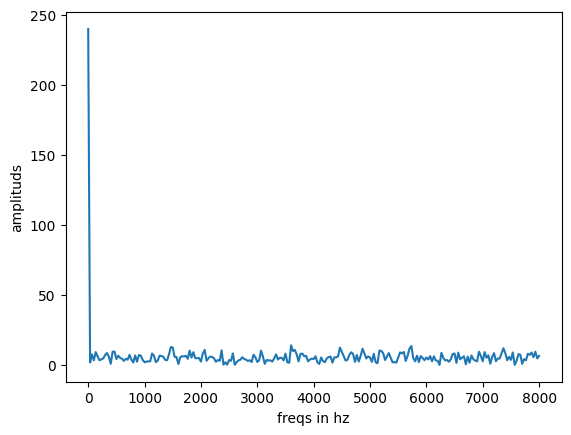

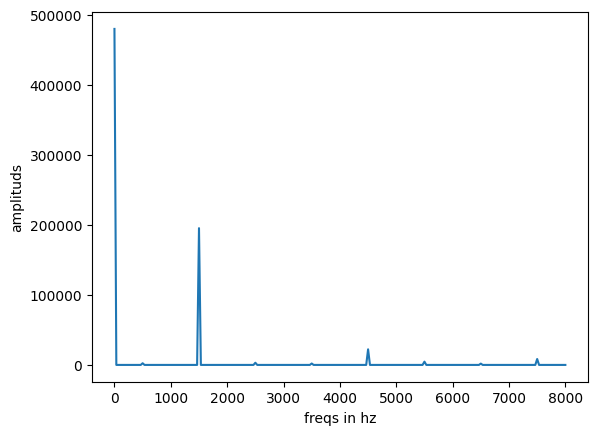

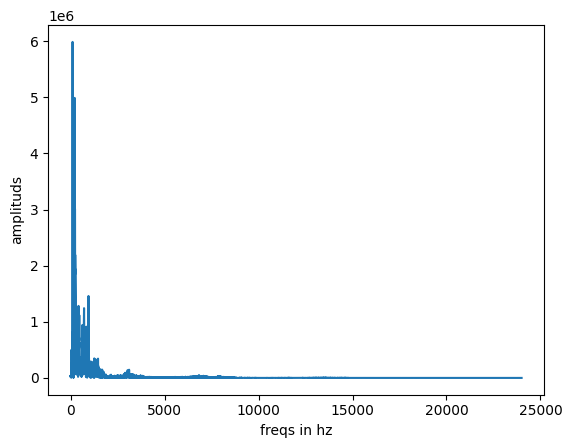

In [7]:

import numpy as np
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt


def write_audio(path, sr, data):
	# path: the path of output file,
	# sr: sampling rate
	# data: the audio waveform data
	data = data.astype('int16')
	wavfile.write(path, sr, data)
	return None

def read_audio(path):
  	sr, data = wavfile.read(path)

  	return sr, data


#--------generating signal ------------------------------------
def gen_sinusoid(freq, duration, sample_rate):
	N = duration * sample_rate
	t_samples = np.arange(N)
	omega = 2 * np.pi * freq / sample_rate # angular frequency
	sinusoid = amplitude * np.sin(omega * t_samples) # sinusoidal signal
	return sinusoid

# generating the triangualr signal
def gen_triangular(freq, duration, sample_rate, amplitude):
    """
    Generate a periodic triangular signal.

    :param freq: Frequency of the triangular wave.
    :param duration: Duration of the signal in seconds.
    :param sample_rate: Sampling rate in Hz.
    :param amplitude: Amplitude of the triangular wave.
    :return: Triangular wave signal.
    """
    t = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)
    signal = amplitude * 2 * np.abs(2 * ((t * freq) % 1) - 1) - 1

    return signal

#-------------- visualising amplitude spectrum -----------------
def plot_ampl_spectr(data, sr, db_scale=False, epsilon=1e-3):
	# data: input fragment of real signal
	# sr: sampling rate of signal
	N = len(data)
	coef_no = int(N / 2) + 1 # coefficients number according to all frequencies
	delta_freq = sr / N # frequency resolution of according N len DFT basis frequencies
	# delta_freq = delta_omega / (2*pi) * sr = sr / N, where delta_omega = 2 * pi / N
	freqs = np.arange(coef_no) * delta_freq
	coefs = np.fft.rfft(data)
	amplitude_spectr = np.abs(coefs)
	amplitude_spectr_db = 10 * np.log10(amplitude_spectr + epsilon)
	if db_scale:
		plt.plot(freqs, amplitude_spectr_db)
	else:
		plt.plot(freqs, amplitude_spectr)
	plt.xlabel('freqs in hz')
	plt.ylabel('amplituds')
	plt.show()
	return None

if __name__ == '__main__':
	# some experiments
	#--------- parameters -----------------------------------------
	file_name = 'generated-examples/sinusoid.wav'
	sample_rate = 16000 # hz
	freq = 1500 # hz
	amplitude = 1000
	duration = 0.03 # secs
	# generating some signals
	sinusoid = gen_sinusoid(freq, duration, sample_rate)
	rand_signal = np.random.rand(int(duration * sample_rate))
	# writing signal as audio
	write_audio(file_name, sample_rate, sinusoid)
	signal = sinusoid
	signal = rand_signal
	# plotting amplitude spectrum, here you can manipulate signal, db_scale of y in plot etc.
	plot_ampl_spectr(signal, sample_rate, db_scale=False)


  	#--------- parameters for triangular signal -------------------
	triangular_file_name = 'generated-examples/triangular.wav'
	triangular_freq = 1500  # Hz
	triangular_amplitude = 1000

  	# Generate triangular signal
	triangular = gen_triangular(triangular_freq, duration, sample_rate, triangular_amplitude)

  	# Write triangular signal as audio
	write_audio(triangular_file_name, sample_rate, triangular)

  	# Plot amplitude spectrum of triangular signal
	plot_ampl_spectr(triangular, sample_rate, db_scale=False)

  	#--------- Analyze voice recording -------------------
	voice_file_name = 'vowel-sounds/a.wav'  # Replace with your file name

  	# Read voice recording
	sr_voice, voice_data = read_audio(voice_file_name)

	# Plot amplitude spectrum of voice recording
	plot_ampl_spectr(voice_data, sr_voice, db_scale=False)

# Analysis

The three graphs provided above represent amplitude spectra for different audio signals. Let's discuss each one:

1. **Sinusoidal Signal Spectrogram**:
   - The first graph shows the amplitude spectrum of a sinusoidal signal.
   - The peak at the very beginning indicates a single dominant frequency component, which is characteristic of a pure sinusoid. The x-axis represents frequency, and the y-axis represents amplitude.
   - The presence of a single peak suggests that the sinusoidal wave has a single frequency and is a pure tone. There are no harmonics or other frequency components visible.

2. **Triangular Signal Spectrogram**:
   - The second graph shows the amplitude spectrum of a triangular signal.
   - Triangular waves are composed of a fundamental frequency and its odd harmonics. The amplitude of each harmonic in a triangular wave is inversely proportional to the square of the harmonic number.
   - The graph shows a strong fundamental frequency (the first and tallest peak), followed by additional peaks at odd multiples of this fundamental frequency, which decrease in amplitude more sharply than in a square wave, according to the \( \frac{1}{n^2} \) relationship where \( n \) is the harmonic number.

3. **Armenian Vowel "Ա" Spectrogram**:
   - The third graph represents the amplitude spectrum of an audio recording, containing the vowel "Ա" as pronounced in Armenian.
   - The spectrogram shows a strong low-frequency component, which corresponds to the fundamental frequency of the vowel sound, often referred to as the pitch of the voice.
   - The multiple peaks visible after the fundamental frequency represent the harmonic overtones. For vowel sounds, these are called formants. The first few formants are the most important in characterizing vowel sounds.
   - Vowel "Ա" typically has its first formant at a lower frequency and the second formant at a higher frequency. The exact frequency values for these formants are characteristic of the specific vowel quality and can vary based on the speaker's vocal tract shape and size.

The spectrograms of voiced speech sounds like vowels typically show several dark bands (formants), which are the resonant frequencies of the vocal tract. The spacing and amplitude of these bands help to determine the perceived vowel sound.